# Example of an ODE system that models a microorganism growth and its enzyme production.

Reference: http://dx.doi.org/10.1016/j.biortech.2015.08.148

# Import libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from procmodeling import solver

from scipy.integrate import odeint

# Define the EDO

In [3]:
equations = """
## LIST OF VARIABLES ##
# y = [X, enz_F, enz_B, enz_Xy]
# y[0] = dydt_0 = X, Biomass
# y[1] = dydt_1 = enz_F, Cellulase enzyme
# y[2] = dydt_2 = enz_B, Beta-glucosidase enzyme
# y[3] = dydt_3 = enz_Xy, Xylanase enzyme

S0 = 2

# Equation for correction of the initial phase (f) up to 16h
Tl = 14.4
f = (1 - exp(-t / Tl))

# Substrate concentration (S) and its variation (dSdt)
qs = -0.027
S = S0 * exp(qs * (t + Tl * exp(-t / Tl) - Tl))
dSdt = f * qs * S

# Variation of microorganism - X
u_m = 0.2
Ks = 0.83
Xm = 40
r = 0.6
ux = u_m * (S / (Ks + S)) * ((1 - (y[0] / Xm)) ** r)
u_md = 0.18
Ksd = 0.47
uxd = f * u_md * (S / (Ksd + S))

dydt[0] = y[0] * (ux - uxd)

# Variation of cellulases (FPase) - enz_F
mf = 6.
Fm = 4000
n = 0.46
Kfs = 43.86
Kif = 0.98
Kfd = 0.023
dydt[1] = f * mf * y[0] * ((1 - (y[1] / Fm)) ** n) * (-Kfs * dSdt) * (1 / (1 + (S / Kif))) - y[1] * Kfd

# Variation of beta-glucosidase - enz_B
mb = 20.94
Bm = 19940.28
o = 1.60
Kbs = 12.22
Kib = 6.58
Kbd = 0.0019
dydt[2] = f * mb * y[0] * ((1 - (y[2] / Bm)) ** o) * (-Kbs * dSdt) * (1 / (1 + (S / Kib))) - y[2] * Kbd

# Variation of xylanase - enz_Xy
mXy = 565.37
Xym = 131240.70
p = 0.44
KXys = 28.59
KiXy = 2.16
KXyd = 0.014
dydt[3] = f * mXy * y[0] * ((1 - (y[3] / Xym)) ** p) * (-KXys * dSdt) * (1 / (1 + (S / KiXy))) - y[3] * KXyd
"""

# Solve the EDO

Load the equations and check if they are correct

edo_functions: Docstring was read


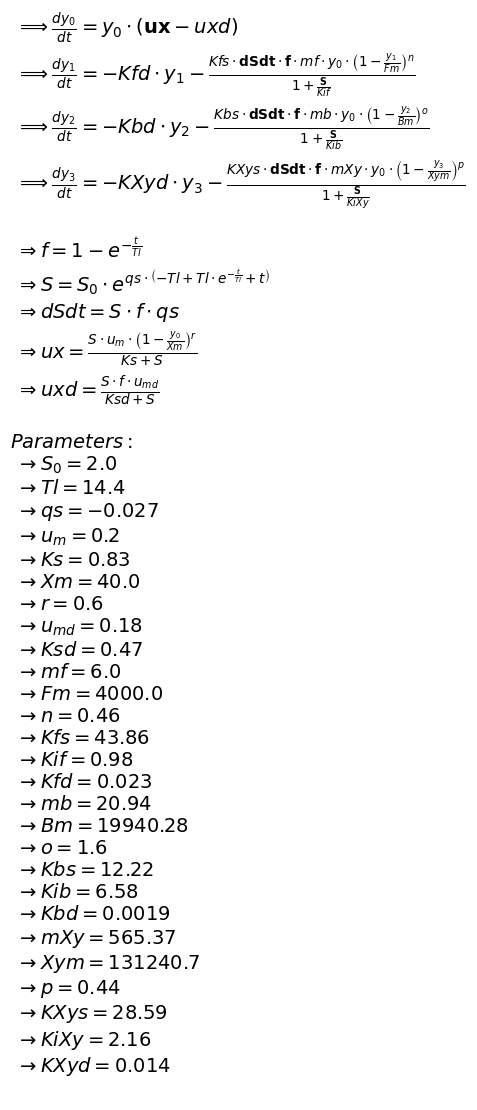

In [4]:
edo = solver.edo_functions(equations)

Solve the ODE from t = 0 to t = 100, with initial conditions:

 → Biomass = 0.6

 → Cellulase enzyme = 0

 → Beta-glucosidase enzyme = 0

 → Xylanase enzyme and predator = 0

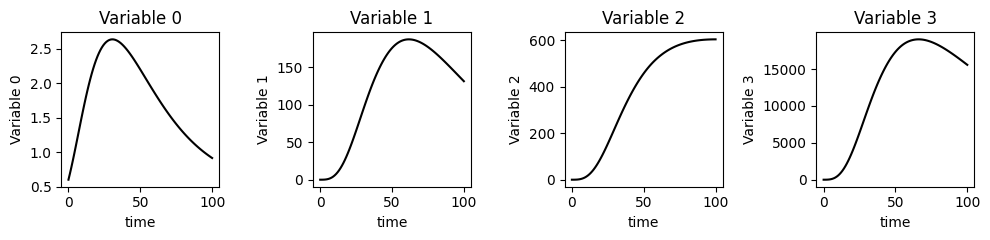

In [5]:
y0 =  [0.6, 0, 0, 0]
edo.solve( [0,100] , y0)